<a href="https://colab.research.google.com/github/koteshvarma2/Data_Science/blob/main/Task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Dataset Loaded Successfully!
Shape: (891, 12)

First 5 Rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123    

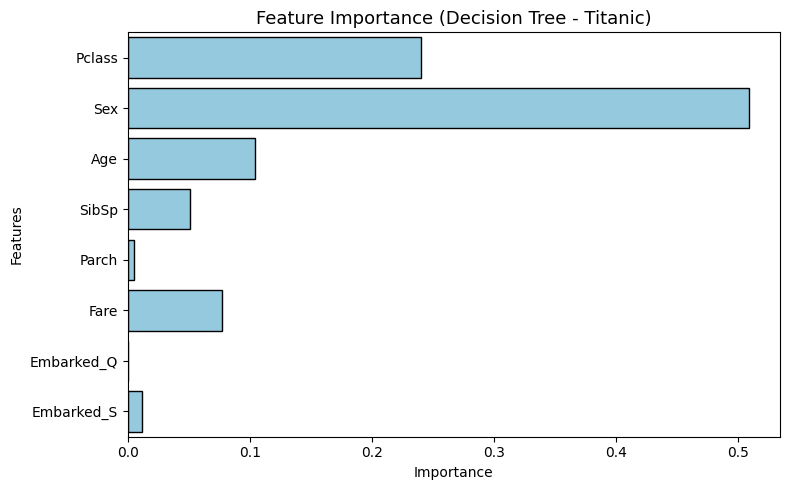

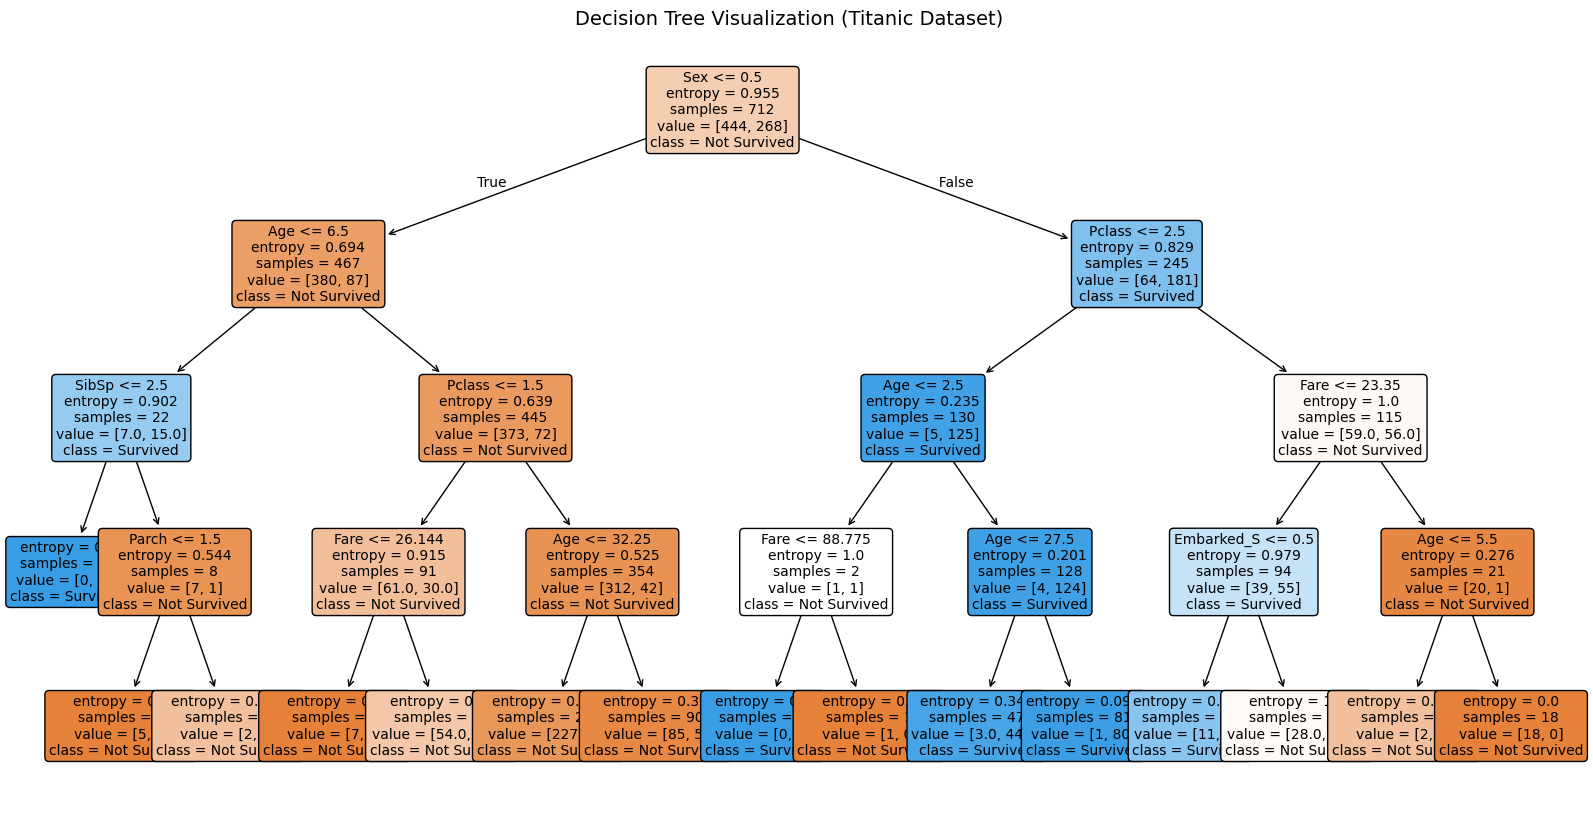

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(" Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_Q', 'Embarked_S']
target = 'Survived'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=features, color='skyblue', edgecolor='black')
plt.title("Feature Importance (Decision Tree - Titanic)", fontsize=13)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=['Not Survived', 'Survived'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Titanic Dataset)", fontsize=14)
plt.show()